# Linear regression

Creating a **linear regression model**. 
* load data from a CSV
* handle missing data
* explore data
* split the data into a train and test set
* create a linear regression model
* evaluate your model



## Dataset description

We will be using the dataset in the file `Life Expectancy Data.csv` for this homework, which contains data from the World Health Organisation (WHO) from different countries between the years 2000 and 2015. We will use it to predict the life expectancy of people in each country.

The features are:
* Country
* Year
* Status ('Developed' or 'Developing')
* Life expectancy
* Adult Mortality (probability of dying between 15 and 60 years per 1000 population)
* infant deaths (per 1000 population)
* Alcohol (recorded per capita (ages 15+) consumption, in litres of pure alcohol)
* percentage expenditure (on health as a percentage of GDP per capita)
* Hepatitis B (percentage immunization coverage among 1-year-olds)
* Measles (number of reported cases per 1000 population)
* BMI (average of entire population)
* under-five deaths (per 1000 population)
* Polio (percentage immunization coverage among 1-year-olds)
* Total expenditure (government expenditure on health as a percentage of total government expenditure)
* Diphtheria (percentage immunization coverage among 1-year-olds
* HIV/AIDS (deaths per 1000 live births, 0-4 years)
* GDP (in USD)
* Population
* thinness 1-19 years (percentage prevalence of thinness)
* thinness 5-9 years (percentage prevalence of thinness)
* Income composition of resources (0-1)
* Schooling (number of years of schooling)

This dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who).

Firstly, the necessary packages are imported (make sure you run the cell):

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load the data

1. Load the `Life Expectancy Data.csv` file into a pandas dataframe called `data`, and print out the first five rows

In [49]:
df_data=pd.read_csv("Life_Expectancy_Data.csv")

In [20]:
df_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## Handle missing values

This dataset has 2938 rows but many of them have some missing values. The linear regression algorithm cannot handle missing values so we need to do something about it.

The easiest option is to just remove all of the rows that have any missing values; that is what we will do here and we will be left with 1649 rows only.

However, if you have some time and want to try to fill in the missing values instead of deleting them here are some options:
- Try replacing the missing values with the average value from the corresponding column (e.g. `data.fillna(data.mean())`).
- Try replacing the missing values with the average value from the corresponding column BUT using the data from the same country only.
- Try replacing the missing values with the value from the previous year (e.g. `data.fillna(method="ffill")`) for each country.

2a. Count how many missing values there are in each column of the data

In [50]:
df_data.isnull().sum()
# same data.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [22]:
df_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

2b. Remove all rows that have any missing values.

Alternatively, try replacing the missing values with one of the methods described above.

In [23]:
# Dropping all rows with any missing values
#df_data = df_data.dropna(subset=["Country", 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
   #    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
   #    'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
   #    'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
   #    'thinness 5-9 years', 'Income composition of resources', 'Schooling' ])
#df_data.isnull().sum()

# Filling missing values with the average value from the corresponding column
#df_data.fillna(df_data.mean())
df_data = df_data.dropna(how="any")
df_data.shape

(1649, 22)

In [51]:
df_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

## Explore the data

The dataset contains information for different countries throughout different years.

Most of the columns contain numeric values (`float64` or `int64`) but some columns contain text.

In this section of the homework, we will do some exploration of the data to see how many rows there are for each year and for each country.

3a. Display the data type of each column

Hint: you can use the DataFrame attribute [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [52]:
df_data.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness 1-19 years                float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

We can count the number of rows for each value in a column using the `.value_counts()` method. Additionally, to sort the results we can use the `.sort_index()` method.

In [53]:
df_data["Year"].value_counts().sort_index()

2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2013    193
2014    183
2015    183
Name: Year, dtype: int64

3b. Count the number of rows for each "Country", saving the result to a variable `s`

In [54]:
s= df_data["Country"].value_counts()

s

Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: Country, Length: 193, dtype: int64

We can display the above found Country count data in a bar chart:

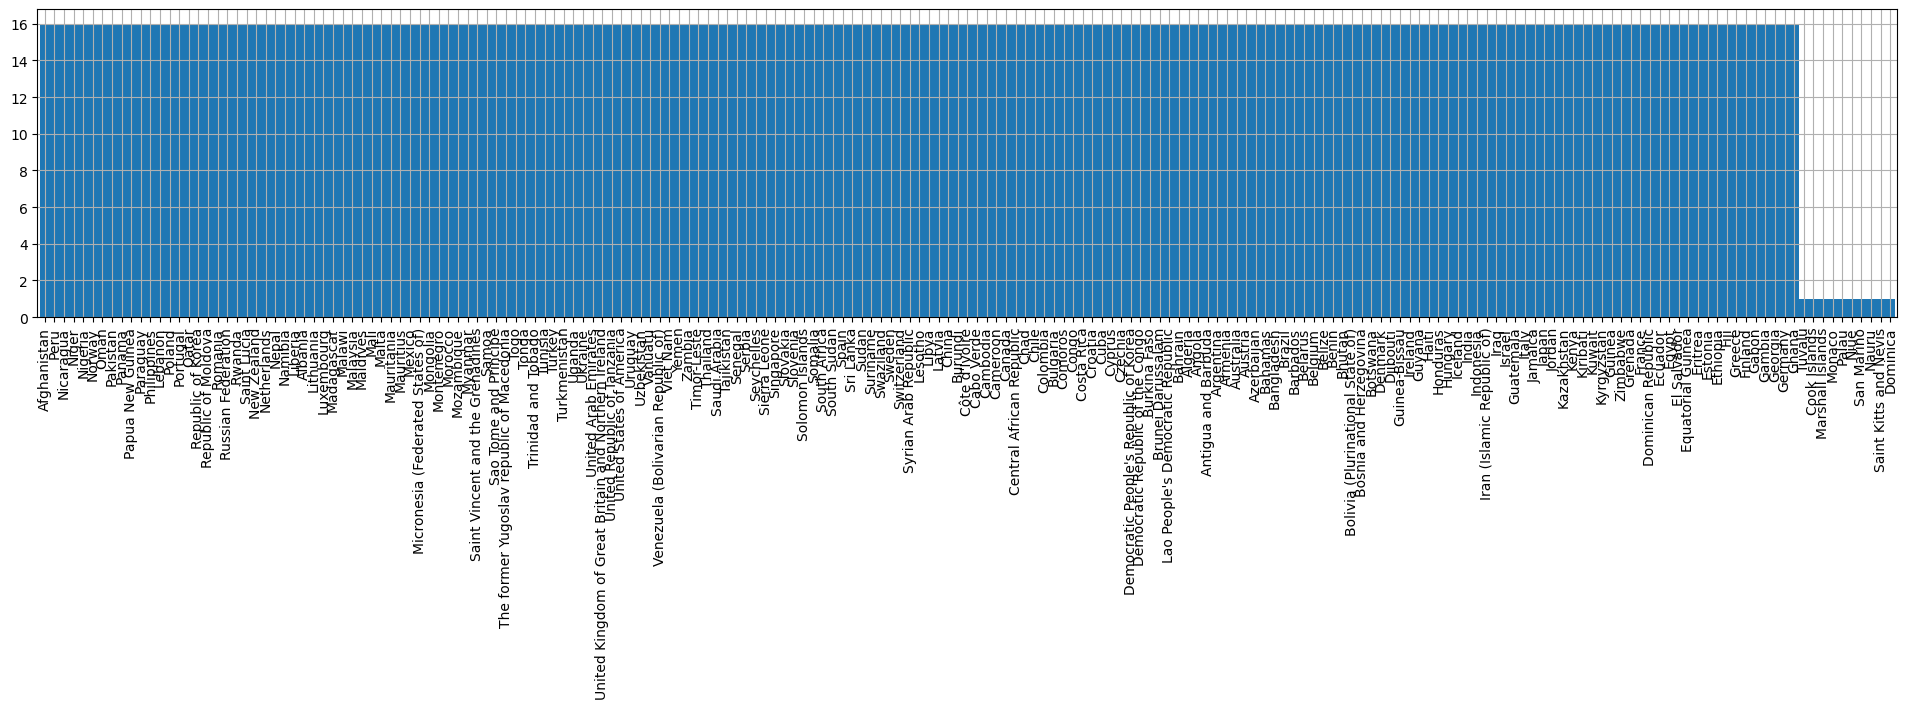

In [55]:
fig, ax = plt.subplots(1, 1, figsize=[24, 4])
s.plot(ax=ax, kind="bar", width=1)
ax.grid()

•Most of the countries have 16 additions into the database except Tuvalu, Cook and Marshall islands, Monaco, Palau, Nue, San Marino, Nauru, Saint Kitts and Nevis and Dominics that have only 1.

/var/folders/f_/s_7jgq1x1j14wsyfmg57w6c80000gn/T/ipykernel_3544/292569493.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_data.corr())


<Axes: >

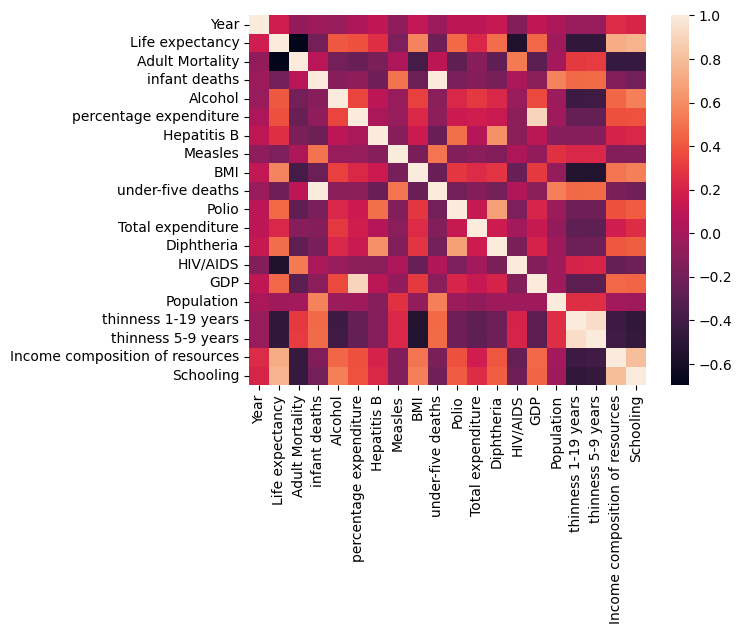

In [56]:
sns.heatmap(df_data.corr())

•Income composition of resources and schooling is most correlated positively with life expectancy, followed by BMI. 

•Alult mortality, thinness and HIV/AIDs are strongly correlated negatively with life Expectancy.

## Split the data into train and test data

We are now going to split the data into train and test datasets. 

The splitting is usually done randomly with the `sklearn` function `train_test_split`.

However, because we now have data from different points in time, we are going to split the data using the `Year` column so that we can use the early years to train the model and then the later years to test the model.

4a. Split the data so that the training data contains all years up to and including 2010 and the test data contains all years after 2010.

We are splitting by the year 2010 to have roughly twice as many rows in the training data than the test.

In [29]:
#from sklearn import train_test_split already imported
df_data_train = df_data[df_data["Year"] <= 2010]
df_data_test = df_data[df_data["Year"] > 2010]


In [30]:
print(df_data_train.shape)
print(df_data_test.shape)

(1127, 22)
(522, 22)


In [31]:
df_data.shape

(1649, 22)

4b. Print the shapes of the test and train data

In [32]:
print(df_data_train.shape)
print(df_data_test.shape)

(1127, 22)
(522, 22)


## Select the features

The features are the columns that we are going to use to train the linear regression model.

For this homework, we will pick all _numeric_ columns in the data except `Life expectancy` because this is what we are going to predict.

5a. Add column name values to the below list, `features`, which we will use as features for the model

Hint: the only non-numeric columns are the `Country` and `Status` columns

In [33]:
features = ['Year','Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']

In [34]:
df_data[features]

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


5b. Create the X and y test and train objects `X_train`, `X_test`, `y_train` and `y_test` for the linear regression model from both the train and test dataframes, the `features` list defined above, and the `Life expectancy` column of the dataframe

In [36]:
X_train = df_data_train[features]
X_test = df_data_test[features]
y_train = df_data_train["Life expectancy"]
y_test = df_data_test["Life expectancy"]

## Scaling the data

Scale the numerical features in your X data and rerun the linear regression model and outputs. 

In [57]:
#Create a standard scaler isntance
scaler=StandardScaler()


In [58]:
#Fit scaler to the data 
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)

## Train the linear regression model

A linear regression model takes numerical features X to predict a numerical variable y - in this case the life expectancy.

Using machine learning models with `sklearn` typically follows this approach:

1. Create the model object
2. Fit the model with the training data
3. Make predictions on the test data
4. Obtain performance metrics, model parameters etc

6a. Create the linear regression model object

In [59]:
lm=LinearRegression()

6b. Fit the model with the training data

In [60]:
lm.fit(X_train_s, y_train)

LinearRegression()

## Make predictions

7a. Make predictions with your model on the test data, storing it as `y_pred`

In [61]:
y_pred=lm.predict(X_test_s)
y_pred

array([61.09180962, 61.62318914, 61.85027333, 62.03318462, 61.73703314,
       74.38763706, 75.84263729, 74.7697902 , 74.92953519, 74.13728247,
       76.51176153, 75.23933362, 75.4138312 , 75.13751507, 57.00876761,
       57.02021668, 55.80165529, 55.08449819, 77.78483753, 78.08923626,
       80.36500443, 79.11525577, 73.80384636, 72.209754  , 72.51768869,
       72.60442143, 87.86103159, 87.41807522, 87.52543526, 87.09817505,
       80.28363737, 76.81192734, 81.42156147, 79.93820165, 72.57384522,
       70.81132536, 72.45018876, 72.2097278 , 66.18866787, 66.18218665,
       66.5023273 , 67.94204379, 73.01741774, 76.37781569, 71.15980871,
       72.32415843, 79.52044258, 77.03385109, 77.53405036, 78.99986592,
       68.76838905, 73.25602037, 70.28717269, 69.86937352, 61.70289443,
       61.38027331, 59.6161446 , 60.94276468, 66.65760906, 66.64517365,
       66.64897083, 66.59150388, 74.25425382, 75.75536022, 74.53575576,
       73.80737718, 65.76598493, 64.54031635, 67.31588769, 59.38

7b. Calculate the model performance via the root mean squared error (rmse)

In [62]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 3.9873490280051653


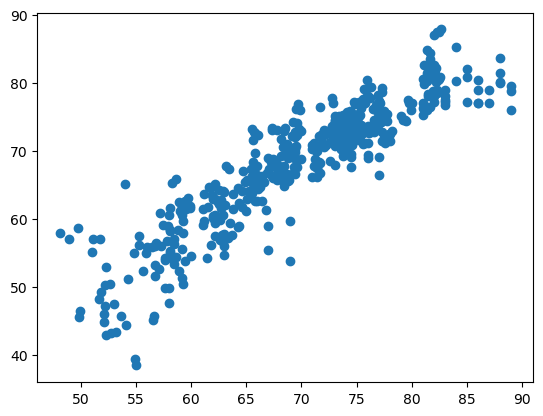

In [63]:
plt.scatter(y_test, y_pred)

## Interpret the results

Below, we plot the predicted life expectancy vs the actual life expectancy to see how similar they are

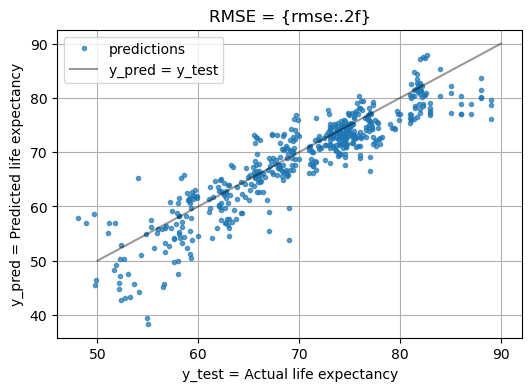

In [64]:
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
ax.plot(y_test, y_pred, label="predictions", linestyle="", marker=".", alpha=0.7)
ax.plot([50, 90], [50, 90], label="y_pred = y_test", color="k", alpha=0.4)
ax.set_xlabel("y_test = Actual life expectancy")
ax.set_ylabel("y_pred = Predicted life expectancy")
ax.set_title("RMSE = {rmse:.2f}")
ax.legend()
ax.grid()

In the predicted vs actual life expectancy plot above, we can see that the dots are scattered around the `y_pred` = `y_test` line, sometimes above and sometimes below.

8a. Plot a histogram of the _difference_ between the predicted life expectancy and the actual life expectancy

Text(0.5, 0, 'Predicted - actual life expectancy (years)')

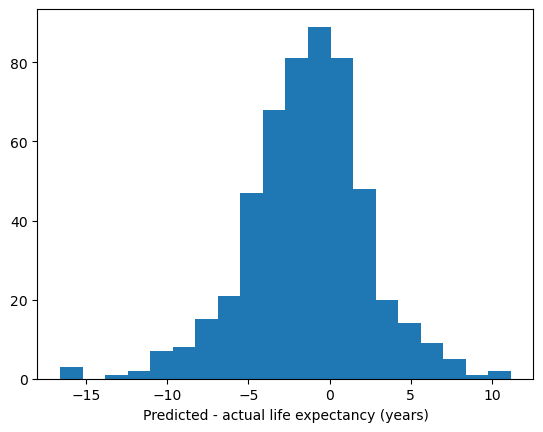

In [65]:
plt.hist((y_pred - y_test), bins=20)
plt.xlabel("Predicted - actual life expectancy (years)")

In the predicted minus actual life expectancy histogram plot above, we can (hopefully) see that the histogram is centered around zero and the maximum difference between predicted and actual life expectancy is about 13 years.

8b. Obtain the linear regression intercept

In [66]:
lm.intercept_

68.85927240461403

We can obtain the linear regression coefficients and place them in a pandas series with the corresponding feature names so they can be plotted.

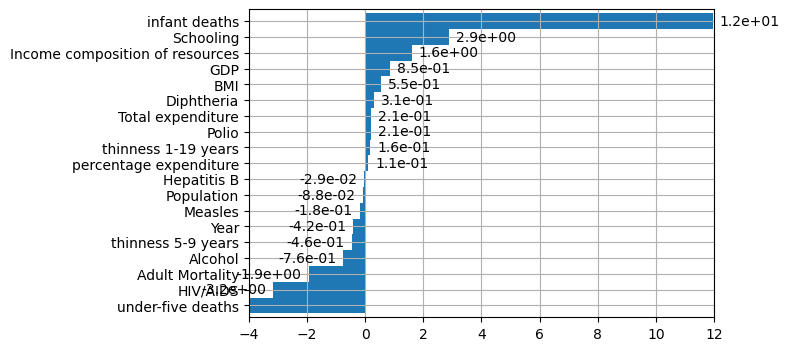

In [67]:
coeff = pd.Series(lm.coef_, features).sort_values()

fig, ax = plt.subplots(1, 1, figsize=[6, 4])
coeff.plot(ax=ax, kind="barh", width=1)
ax.bar_label(ax.containers[0], fmt="%.1e", padding=5)
ax.set_xlim(-4, 12)
ax.grid()

Evaluation metrics can be used to measure the actual discrepancy between the predicted values and actual values on our unseen test set.



 This discrepancy is known as the residual error and can be summarized by a selection of metrics:

• Mean absolute error: the average absolute error between predicted and actual values. MAE provides a straightforward interpretation, as it represents the average magnitude of errors in the model's predictions. A lower MAE indicates better model performance.

• Mean squared error: The average squared error between predicted and actual values. MSE emphasizes larger errors more than MAE because it squares the differences. A smaller MSE is better, but it may be sensitive to outliers.

• Root mean squared error: The square root of the average squared error between predicted and actual values. RMSE is often preferred because it returns an error metric in the same units as the target variable, making it easier to interpret. Like MSE, a lower RMSE indicates better model performance.

In [76]:
# Metrics: Evaluate the MAE, MSE and RMSE of the trained model
metrics.mean_absolute_error(y_test, y_pred)


2.978848657332077

In [77]:
metrics.mean_squared_error(y_test, y_pred)


15.898952271133737

In [79]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 3.9873490280051653


• MAE, MSE and RMSE of the trained model return low numbers suggesting that the our model performs well

### Conclusions:

•From the linear regression coefficients bar plot above, we can see that the feature that has the largest impact on life expectancy  (the linear regression because it has the largest coefficient absolute value) is the "Infant deaths".

Because we did scale the features, we can say whether this feature really is the most important or it is just due to the feature having values of a different order of magnitue from the rest of the features. 

What we can see from the plot is which features have a positive effect on the life expectancy (e.g. `Schooling, and Income composition of resoures` because the coefficient is positive) and which features have a negative effect on the life expectancy (e.g. `under-five deaths` or `HIV/AIDS` because they have a negative coefficient).

8c. Use the below plot code to explore the relationship between a chosen feature `x` and the life expectancy `y`

Features with a positive coefficient and some with a negative coefficient

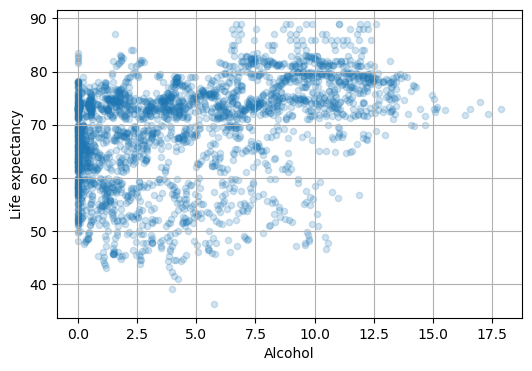

In [68]:
x = "Alcohol"
y = "Life expectancy"
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
df_data.plot(ax=ax, kind="scatter", x=x, y=y, alpha=0.2)
ax.grid()

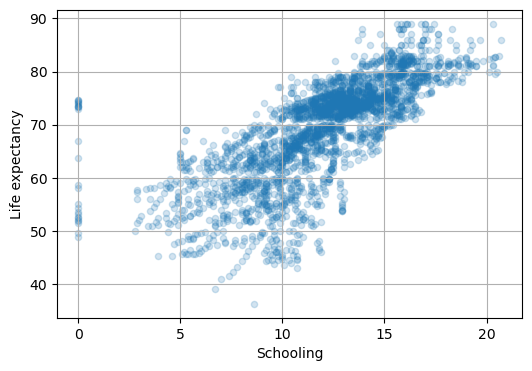

In [69]:
x = "Schooling"
y = "Life expectancy"
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
df_data.plot(ax=ax, kind="scatter", x=x, y=y, alpha=0.2)
ax.grid()

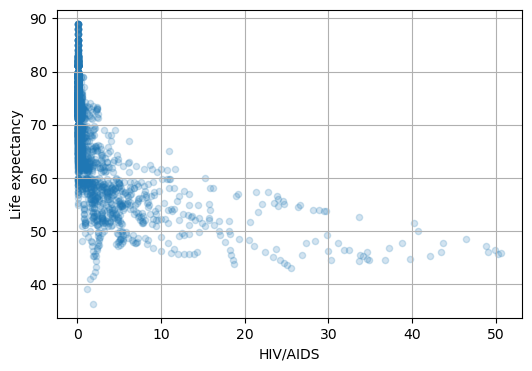

In [73]:
x = "HIV/AIDS"
y = "Life expectancy"
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
df_data.plot(ax=ax, kind="scatter", x=x, y=y, alpha=0.2)
ax.grid()

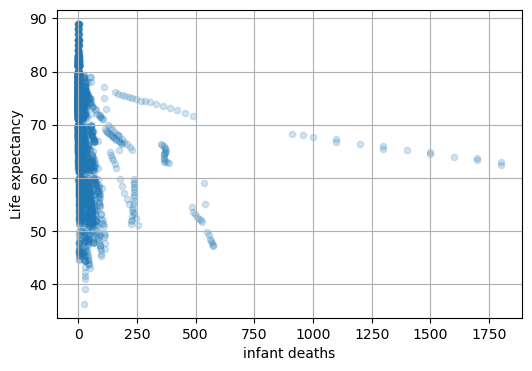

In [71]:
x = "infant deaths"
y = "Life expectancy"
fig, ax = plt.subplots(1, 1, figsize=[6, 4])
df_data.plot(ax=ax, kind="scatter", x=x, y=y, alpha=0.2)
ax.grid()